In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from astropy import units as u
import astropy.coordinates as coord

In [2]:
dir = 'D:/pzivi/Research/Gurtina_Project/'


#### Set assumed center coordinates for the SMC
#### Then transform into Galactocentric frame

smcra, smcdec, smcdist, smcpmra, smcpmdec, smcvrad = 13.04, -73.10, 60.6, 0.67, -1.20, 148.0

c = coord.SkyCoord(ra=smcra*u.degree, dec=smcdec*u.degree, distance=smcdist*u.kpc, \
                   pm_ra_cosdec=smcpmra*u.mas/u.yr, pm_dec=smcpmdec*u.mas/u.yr, \
                   radial_velocity=smcvrad*u.km/u.s, frame='icrs')

print(c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))) 

c2 = c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))

smc_center = np.asarray([c2.x.value, c2.y.value, c2.z.value, c2.v_x.value, c2.v_y.value, c2.v_z.value])

print(smc_center)
print(np.sqrt(smc_center[0]**2 + smc_center[1]**2 + smc_center[2]**2))
print(np.sqrt(smc_center[3]**2 + smc_center[4]**2 + smc_center[5]**2))


#### Check that it works going back the other way

test = coord.SkyCoord(x = smc_center[0] * u.kpc, y = smc_center[1] * u.kpc, z = smc_center[2] * u.kpc, \
                       v_x = smc_center[3] * u.km/u.s, v_y = smc_center[4] * u.km/u.s, \
                       v_z = smc_center[5] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
testb = test.transform_to(coord.ICRS)

print(testb)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (15.43241556, -36.60024474, -42.15749726)
 (v_x, v_y, v_z) in km / s
    (40.73769469, -149.18103604, 153.24272356)>
[  15.43241556  -36.60024474  -42.15749726   40.73769469 -149.18103604
  153.24272356]
57.92229225678382
217.71052709001808
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (13.04, -73.1, 60.6)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.67, -1.2, 148.)>


<Figure size 432x288 with 0 Axes>

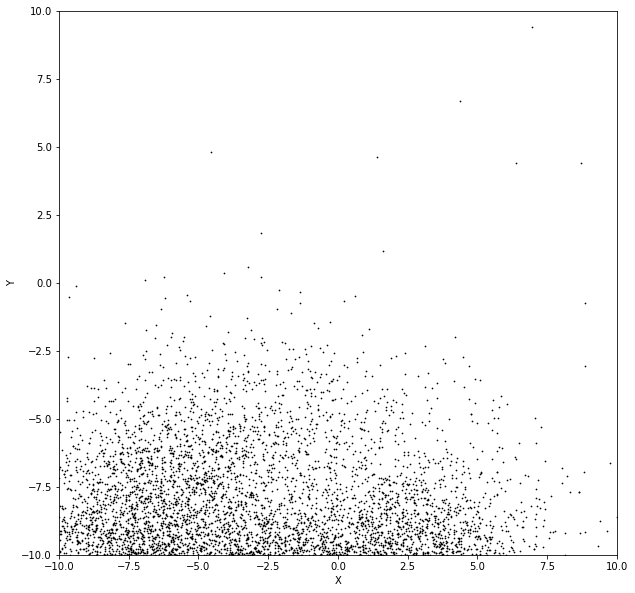

<Figure size 432x288 with 0 Axes>

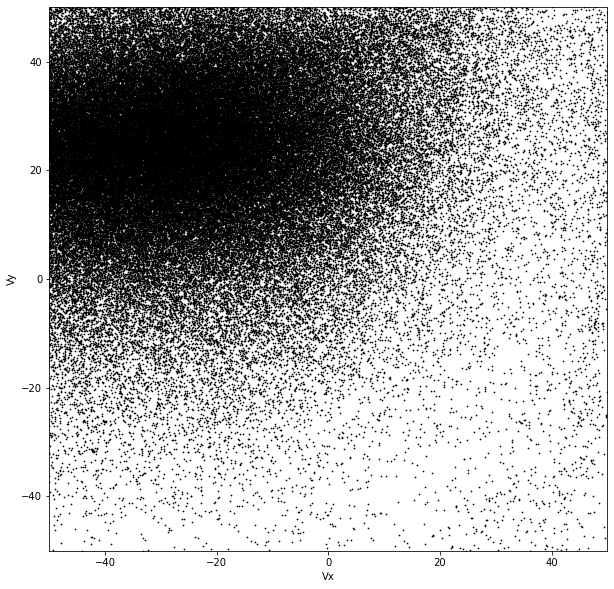

In [5]:
# Load in Model 2 Future 40 data

smcf40filebase = dir + 'Data/SMC_Model2_F40/SMC_' 

####

smcf40_new = np.loadtxt(smcf40filebase+'NewStars_Model2_Future40.txt')

smcf40age_new = np.loadtxt(smcf40filebase + 'NewStars_Model2_Future40_Ages.txt')
smcf40age_new.shape = (len(smcf40age_new), 1)

smcf40_new = np.hstack((smcf40age_new, smcf40_new))

####

smcf40_old = np.loadtxt(smcf40filebase+'OldStars_Model2_Future40.txt')

smcf40age_old = np.full((len(smcf40_old), 1), 6040.0)


smcf40_old = np.hstack((smcf40age_old, smcf40_old))


smcf40_orig = np.vstack((smcf40_new, smcf40_old))

####

smcf40 = Table(data=smcf40_orig, names=['Age', 'Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

####

smcf40gas_orig = np.loadtxt(smcf40filebase+'Gas_Model2_Future40.txt')
smcf40_gas = Table(data=smcf40gas_orig, names=['Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smcf40_center = np.asarray([5.5, -35.1, -39.2, -66.1680, -257.657, 197.569])
x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5


####

def add_initial_columns(table, shift1, shift2):
    x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5
    
    try:
        table.add_column((table['X_sim'] - shift1[x]), name='X_0')
        table.add_column((table['Y_sim'] - shift1[y]), name='Y_0')
        table.add_column((table['Z_sim'] - shift1[z]), name='Z_0')
        table.add_column((table['Vx_sim'] - shift1[vx]), name='Vx_0')
        table.add_column((table['Vy_sim'] - shift1[vy]), name='Vy_0')
        table.add_column((table['Vz_sim'] - shift1[vz]), name='Vz_0')
        
        table.add_column((table['X_0'] + shift2[x]), name='X_G')
        table.add_column((table['Y_0'] + shift2[y]), name='Y_G')
        table.add_column((table['Z_0'] + shift2[z]), name='Z_G')
        table.add_column((table['Vx_0'] + shift2[vx]), name='Vx_G')
        table.add_column((table['Vy_0'] + shift2[vy]), name='Vy_G')
        table.add_column((table['Vz_0'] + shift2[vz]), name='Vz_G')
        
    except ValueError:
        print("You already added these columns.")
        
    return table
        
smcf40 = add_initial_columns(smcf40, smcf40_center, smc_center)

####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf40['X_0'], smcf40['Y_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf40['Vx_0'], smcf40['Vy_0'], s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()


####

smcf40_gas = add_initial_columns(smcf40_gas, smcf40_center, smc_center)

You have already added these columns.
The different lengths are: 
204041 168390 13899


<Figure size 432x288 with 0 Axes>

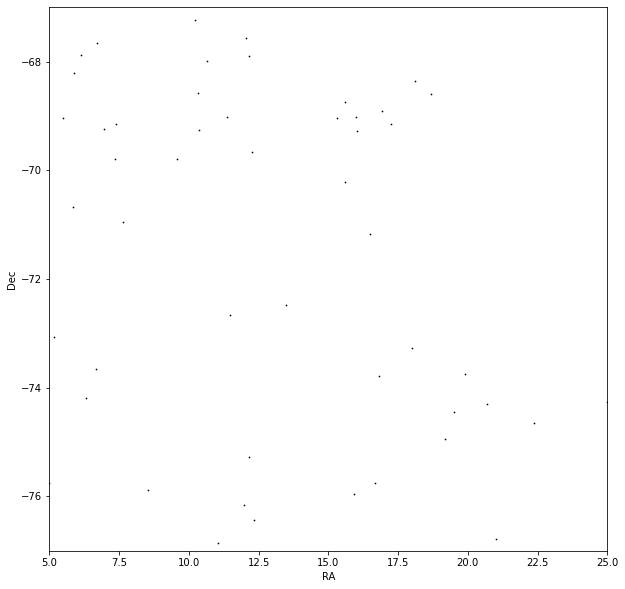

<Figure size 432x288 with 0 Axes>

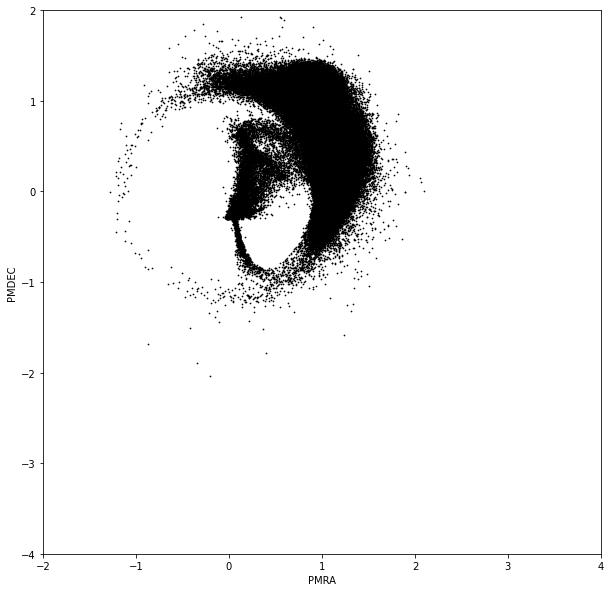

<Figure size 432x288 with 0 Axes>

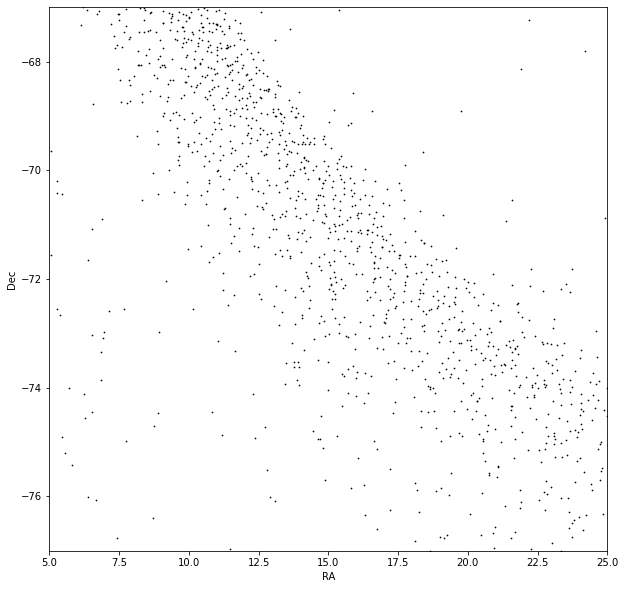

<Figure size 432x288 with 0 Axes>

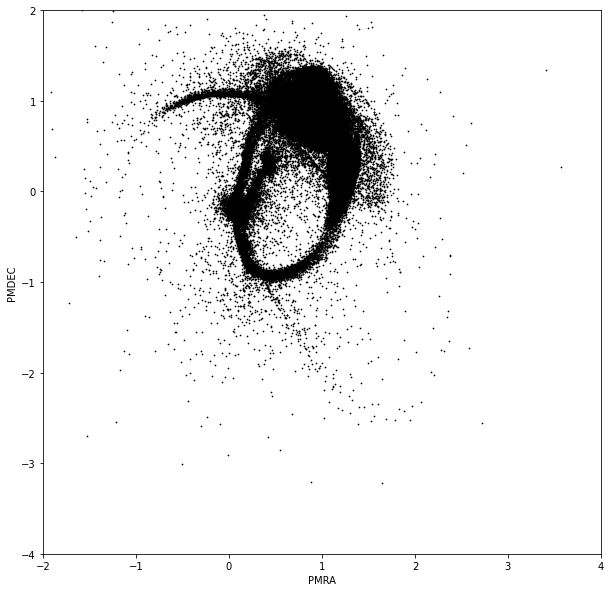

In [7]:
temp1a = coord.SkyCoord(x = smcf40['X_G'] * u.kpc, y = smcf40['Y_G'] * u.kpc, z = smcf40['Z_G'] * u.kpc, \
                       v_x = smcf40['Vx_G'] * u.km/u.s, v_y = smcf40['Vy_G'] * u.km/u.s, \
                       v_z = smcf40['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1b = temp1a.transform_to(coord.ICRS)

####

def add_wcs_columns(table, wcsvals):
    try:
        table.add_column(wcsvals.ra.value, name='RA')
        table.add_column(wcsvals.dec.value, name='DEC')
        table.add_column(wcsvals.distance.value, name='Dist')
        table.add_column(wcsvals.pm_ra_cosdec.value, name='PMRA')
        table.add_column(wcsvals.pm_dec.value, name='PMDEC')
        table.add_column(wcsvals.radial_velocity.value, name='RV')
        
    except ValueError:
        print("You have already added these columns.")
        
    return table

####



smcf40 = add_wcs_columns(smcf40, temp1b)


smcf40.write(dir + "Data/allstar_Model2_F40.fits", overwrite=True)


smcf40_old = smcf40[(smcf40['Age'] >= 1040.0)]

smcf40_old.write(dir + "Data/allstar_Model2_F40_old.fits", overwrite=True)


smcf40_young = smcf40[(smcf40['Age'] < 290.)]

smcf40_young.write(dir + "Data/allstar_Model2_F40_young.fits", overwrite=True)

print("The different lengths are: ")
print(len(smcf40), len(smcf40_old), len(smcf40_young))


### now do the same for the gas

temp1c = coord.SkyCoord(x = smcf40_gas['X_G'] * u.kpc, y = smcf40_gas['Y_G'] * u.kpc, z = smcf40_gas['Z_G'] * u.kpc, \
                       v_x = smcf40_gas['Vx_G'] * u.km/u.s, v_y = smcf40_gas['Vy_G'] * u.km/u.s, \
                       v_z = smcf40_gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1d = temp1c.transform_to(coord.ICRS)

smcf40_gas = add_wcs_columns(smcf40_gas, temp1d)

smcf40_gas.write(dir + "Data/allstar_Model2_F40_Gas.fits", overwrite=True)



####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf40['RA'], smcf40['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf40['PMRA'], smcf40['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf40_gas['RA'], smcf40_gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf40_gas['PMRA'], smcf40_gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()

<Figure size 432x288 with 0 Axes>

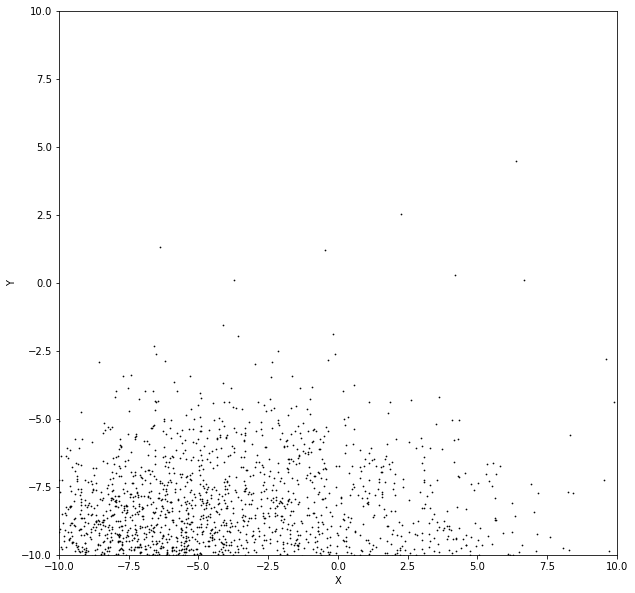

<Figure size 432x288 with 0 Axes>

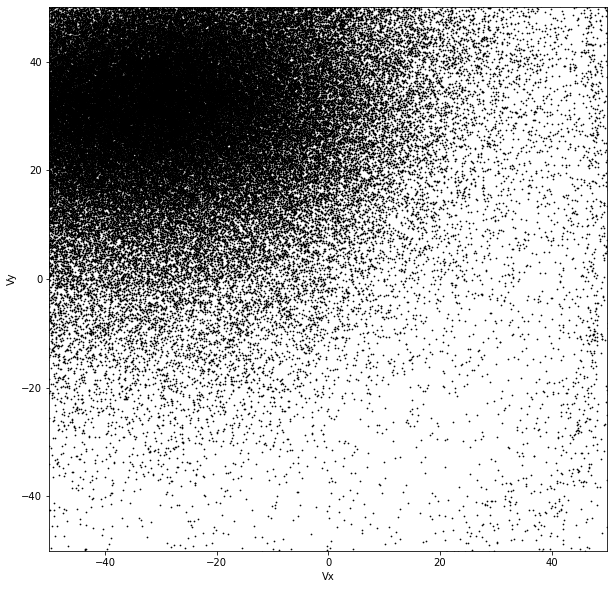

In [8]:
# Load in Model 2 Future 60 data

smcf60filebase = dir + 'Data/SMC_Model2_F60/SMC_' 

####

smcf60_new = np.loadtxt(smcf60filebase+'NewStars_Model2_Future60.txt')

smcf60age_new = np.loadtxt(smcf60filebase + 'NewStars_Model2_Future60_Ages.txt')
smcf60age_new.shape = (len(smcf60age_new), 1)

smcf60_new = np.hstack((smcf60age_new, smcf60_new))

####

smcf60_old = np.loadtxt(smcf60filebase+'OldStars_Model2_Future60.txt')

smcf60age_old = np.full((len(smcf60_old), 1), 6060.0)


smcf60_old = np.hstack((smcf60age_old, smcf60_old))


smcf60_orig = np.vstack((smcf60_new, smcf60_old))

####

smcf60 = Table(data=smcf60_orig, names=['Age', 'Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

####

smcf60gas_orig = np.loadtxt(smcf60filebase+'Gas_Model2_Future60.txt')
smcf60_gas = Table(data=smcf60gas_orig, names=['Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smcf60_center = np.asarray([5.5, -35.1, -39.2, -66.1680, -257.657, 197.569])
x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5


####

smcf60 = add_initial_columns(smcf60, smcf60_center, smc_center)

####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf60['X_0'], smcf60['Y_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf60['Vx_0'], smcf60['Vy_0'], s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()


####

smcf60_gas = add_initial_columns(smcf60_gas, smcf60_center, smc_center)

The different lengths are: 
204648 99999 14748


<Figure size 432x288 with 0 Axes>

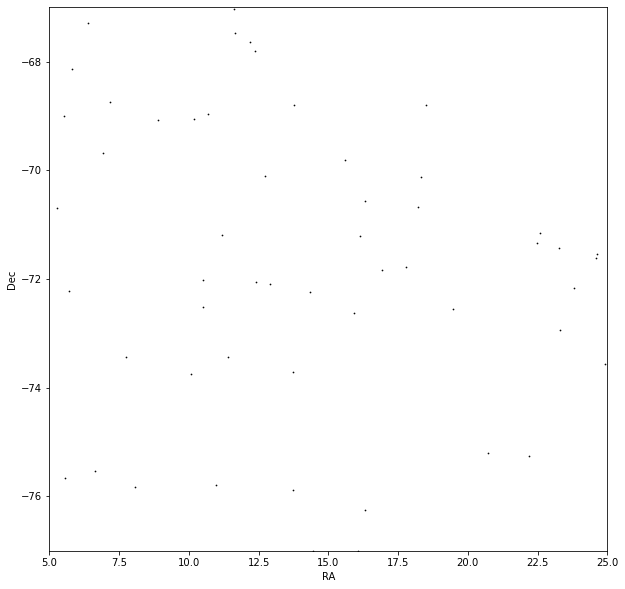

<Figure size 432x288 with 0 Axes>

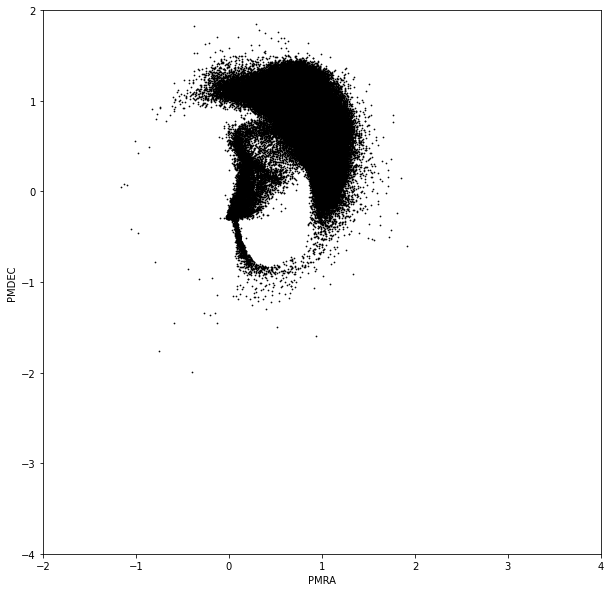

<Figure size 432x288 with 0 Axes>

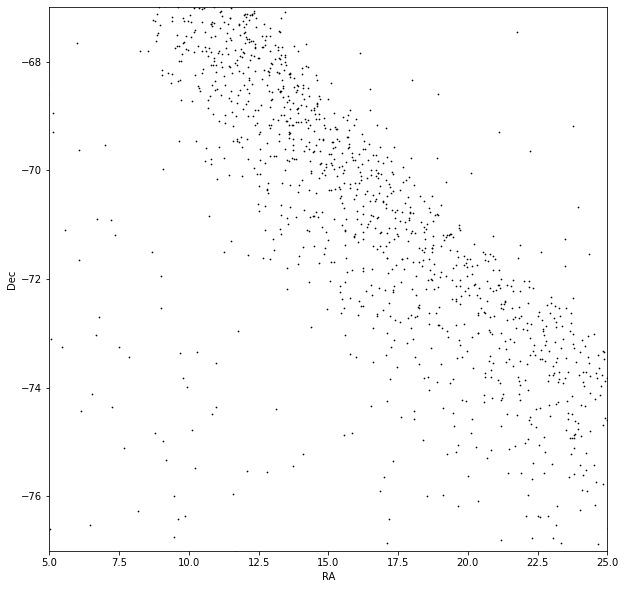

<Figure size 432x288 with 0 Axes>

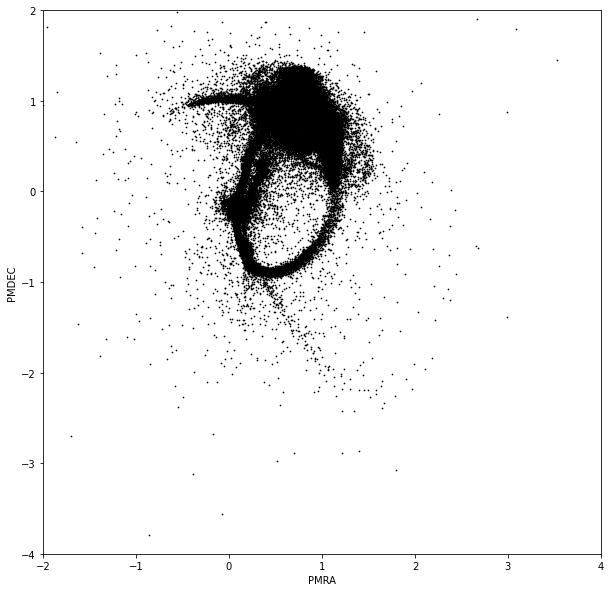

In [9]:
temp2a = coord.SkyCoord(x = smcf60['X_G'] * u.kpc, y = smcf60['Y_G'] * u.kpc, z = smcf60['Z_G'] * u.kpc, \
                       v_x = smcf60['Vx_G'] * u.km/u.s, v_y = smcf60['Vy_G'] * u.km/u.s, \
                       v_z = smcf60['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp2b = temp2a.transform_to(coord.ICRS)

####

smcf60 = add_wcs_columns(smcf60, temp2b)


smcf60.write(dir + "Data/allstar_Model2_F60.fits", overwrite=True)


smcf60_old = smcf60[(smcf60['Age'] >= 1060.0)]

smcf60_old.write(dir + "Data/allstar_Model2_F60_old.fits", overwrite=True)


smcf60_young = smcf60[(smcf60['Age'] < 310.)]

smcf60_young.write(dir + "Data/allstar_Model2_F60_young.fits", overwrite=True)

print("The different lengths are: ")
print(len(smcf60), len(smcf60_old), len(smcf60_young))


### now do the same for the gas

temp2c = coord.SkyCoord(x = smcf60_gas['X_G'] * u.kpc, y = smcf60_gas['Y_G'] * u.kpc, z = smcf60_gas['Z_G'] * u.kpc, \
                       v_x = smcf60_gas['Vx_G'] * u.km/u.s, v_y = smcf60_gas['Vy_G'] * u.km/u.s, \
                       v_z = smcf60_gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp2d = temp2c.transform_to(coord.ICRS)

smcf60_gas = add_wcs_columns(smcf60_gas, temp2d)

smcf60_gas.write(dir + "Data/allstar_Model2_F60_Gas.fits", overwrite=True)



####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf60['RA'], smcf60['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf60['PMRA'], smcf60['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf60_gas['RA'], smcf60_gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf60_gas['PMRA'], smcf60_gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()

<Figure size 432x288 with 0 Axes>

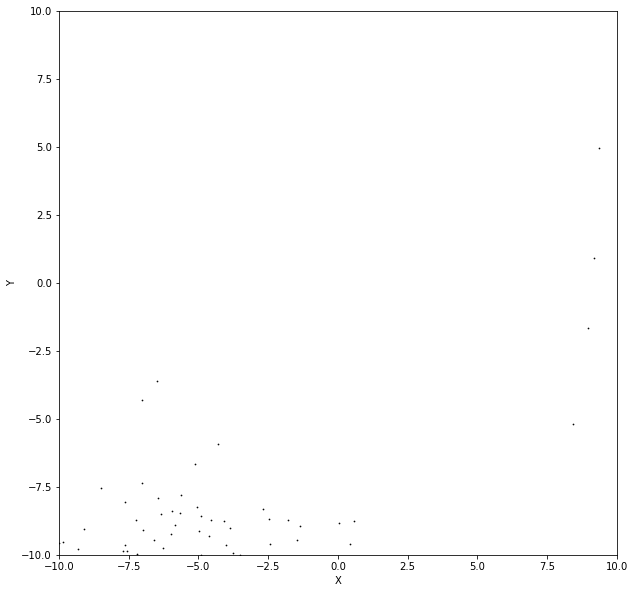

<Figure size 432x288 with 0 Axes>

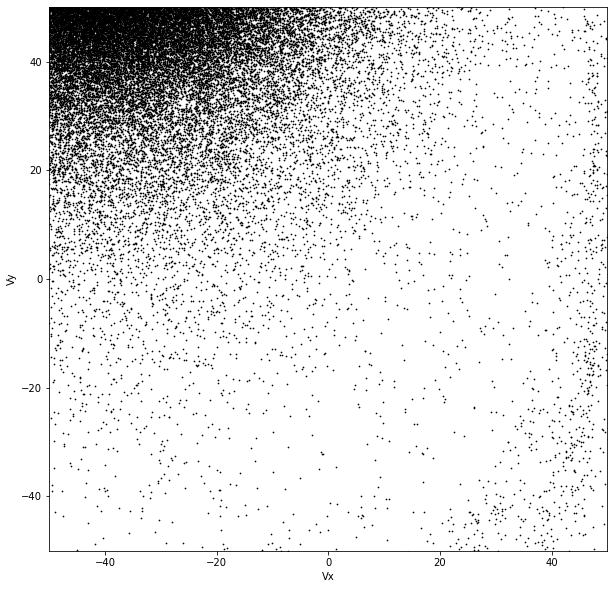

In [10]:
# Load in Model 2 Future 100 data

smcf100filebase = dir + 'Data/SMC_Model2_F100/SMC_' 

####

smcf100_new = np.loadtxt(smcf100filebase+'NewStars_Model2_Future100.txt')

smcf100age_new = np.loadtxt(smcf100filebase + 'NewStars_Model2_Future100_Ages.txt')
smcf100age_new.shape = (len(smcf100age_new), 1)

smcf100_new = np.hstack((smcf100age_new, smcf100_new))

####

smcf100_old = np.loadtxt(smcf100filebase+'OldStars_Model2_Future100.txt')

smcf100age_old = np.full((len(smcf100_old), 1), 6100.0)


smcf100_old = np.hstack((smcf100age_old, smcf100_old))


smcf100_orig = np.vstack((smcf100_new, smcf100_old))

####

smcf100 = Table(data=smcf100_orig, names=['Age', 'Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

####

smcf100gas_orig = np.loadtxt(smcf100filebase+'Gas_Model2_Future100.txt')
smcf100_gas = Table(data=smcf100gas_orig, names=['Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smcf100_center = np.asarray([5.5, -35.1, -39.2, -66.1680, -257.657, 197.569])
x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5


####

smcf100 = add_initial_columns(smcf100, smcf100_center, smc_center)

####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf100['X_0'], smcf100['Y_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smcf100['Vx_0'], smcf100['Vy_0'], s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()


####

smcf100_gas = add_initial_columns(smcf100_gas, smcf100_center, smc_center)

The different lengths are: 
206305 168312 16293


<Figure size 432x288 with 0 Axes>

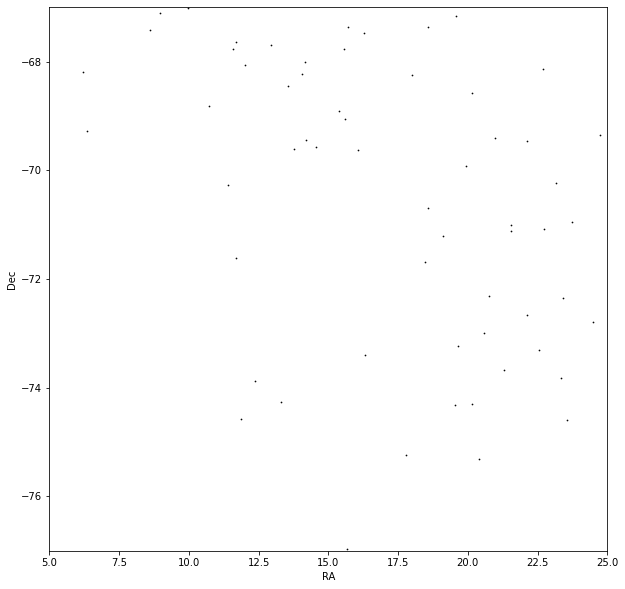

<Figure size 432x288 with 0 Axes>

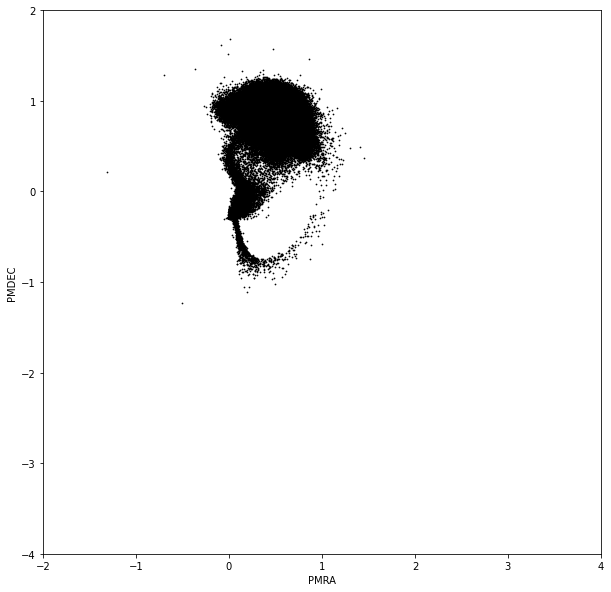

<Figure size 432x288 with 0 Axes>

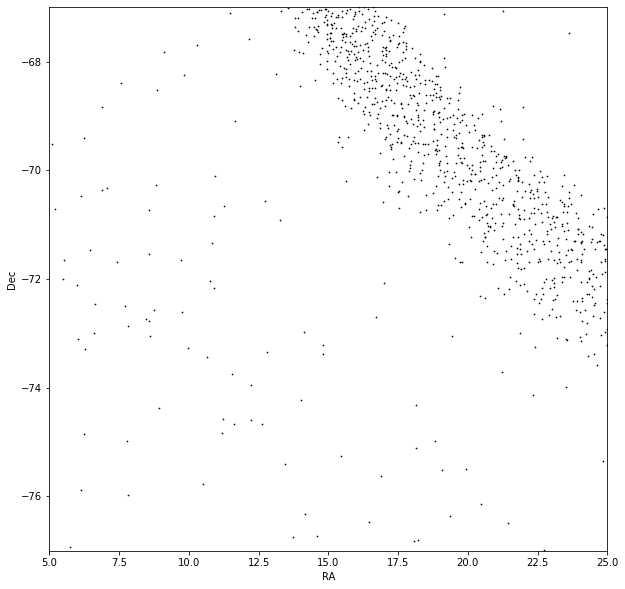

<Figure size 432x288 with 0 Axes>

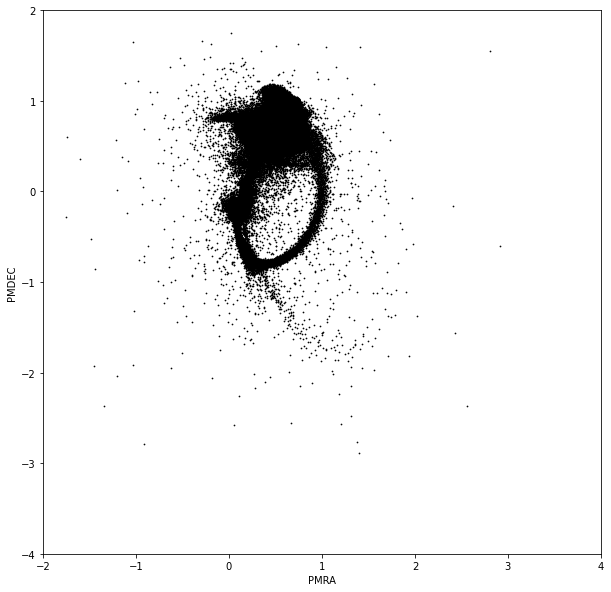

In [11]:
temp3a = coord.SkyCoord(x = smcf100['X_G'] * u.kpc, y = smcf100['Y_G'] * u.kpc, z = smcf100['Z_G'] * u.kpc, \
                       v_x = smcf100['Vx_G'] * u.km/u.s, v_y = smcf100['Vy_G'] * u.km/u.s, \
                       v_z = smcf100['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp3b = temp3a.transform_to(coord.ICRS)

####

smcf100 = add_wcs_columns(smcf100, temp3b)


smcf100.write(dir + "Data/allstar_Model2_F100.fits", overwrite=True)


smcf100_old = smcf100[(smcf100['Age'] >= 1100.0)]

smcf100_old.write(dir + "Data/allstar_Model2_F100_old.fits", overwrite=True)


smcf100_young = smcf100[(smcf100['Age'] < 350.)]

smcf100_young.write(dir + "Data/allstar_Model2_F100_young.fits", overwrite=True)

print("The different lengths are: ")
print(len(smcf100), len(smcf100_old), len(smcf100_young))


### now do the same for the gas

temp3c = coord.SkyCoord(x = smcf100_gas['X_G'] * u.kpc, y = smcf100_gas['Y_G'] * u.kpc, z = smcf100_gas['Z_G'] * u.kpc, \
                       v_x = smcf100_gas['Vx_G'] * u.km/u.s, v_y = smcf100_gas['Vy_G'] * u.km/u.s, \
                       v_z = smcf100_gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp3d = temp3c.transform_to(coord.ICRS)

smcf100_gas = add_wcs_columns(smcf100_gas, temp3d)

smcf100_gas.write(dir + "Data/allstar_Model2_F100_Gas.fits", overwrite=True)



####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf100['RA'], smcf100['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf100['PMRA'], smcf100['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf100_gas['RA'], smcf100_gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smcf100_gas['PMRA'], smcf100_gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()